 Import libraries and load the data into a dataframe

In [ ]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Browse the data, listing maximum and minimum and average values and inspect the values in the dataframe like this:

In [ ]:
data.head(10)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Check correlation with heatmap graph

<AxesSubplot:>

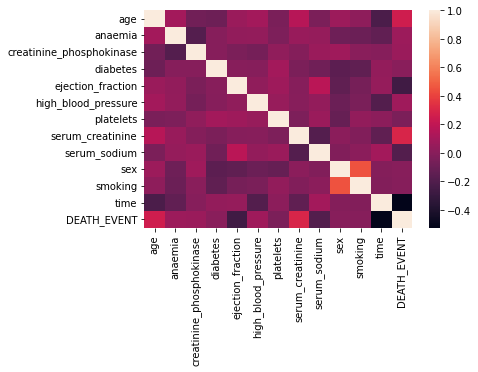

In [ ]:
import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)



In [ ]:
data['ejection_fraction'].corr( data["diabetes"])

-0.004850309667581045

In [ ]:
data["anaemia"].corr(data["platelets"])

-0.04378554973240576

Prepare the test and training data sets

In [ ]:
import numpy as np
labels=data['DEATH_EVENT']
features = data.iloc[:,0:12]
from sklearn.model_selection import train_test_split
X=features
y=np.ravel(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

normalize the values that put the data on a standard scale, which is a standard practice with machine learning.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Activation Function

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(12,))) #change input shape to the number of input features
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

binary_crossentropy because our label data is binary (1) survived and (0) died.

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

Epoch 1/5
164/164 [==============================] - 1s 2ms/step - loss: 0.6216 - accuracy: 0.7195
Epoch 2/5
164/164 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.7317
Epoch 3/5
164/164 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7317
Epoch 4/5
164/164 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.7317
Epoch 5/5
164/164 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7317


In [ ]:
for layer in model.layers:
  weights = layer.get_weights()
  print(weights)

[array([[ 0.10437385,  0.02992926,  0.17114036,  0.5126298 ,  0.38351786,
        -0.32094783, -0.2393698 , -0.15618949],
       [ 0.39020094,  0.3887211 , -0.06861605, -0.23234813,  0.12478306,
         0.32455814, -0.20134981, -0.3659327 ],
       [-0.12075672, -0.47124034, -0.1085246 , -0.4926829 ,  0.1957031 ,
         0.5096129 ,  0.28533408,  0.23451471],
       [ 0.09754832,  0.19795378,  0.43896616,  0.0067477 , -0.21451591,
        -0.36105108, -0.19185886,  0.5000897 ],
       [ 0.51836073,  0.24403687,  0.17431648,  0.51901263, -0.36025357,
        -0.21957956,  0.13884936,  0.23621942],
       [ 0.0412452 ,  0.02703301,  0.02146384, -0.5038585 , -0.03073231,
         0.08461236, -0.363519  ,  0.16565931],
       [ 0.5425265 ,  0.5092001 , -0.17845213, -0.12052125, -0.05083605,
         0.16183169,  0.26639482,  0.11112984],
       [-0.3715286 , -0.31504172,  0.05569688, -0.11897865, -0.26809645,
         0.30263218, -0.39500836, -0.47774407],
       [ 0.40912572, -0.0057718

 draw a picture of the layers and their shapes

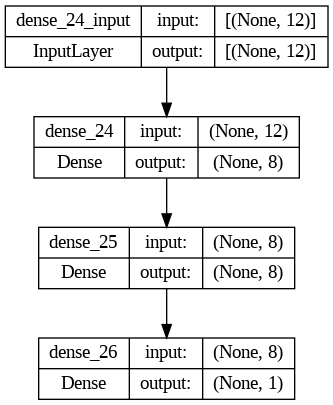

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

run predictions on test data

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


evaluate the score, or accuracy

In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5/5 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.6148
[0.6837295889854431, 0.614814817905426]


In [ ]:
metrics_names = model.metrics_names
metrics_values = model.evaluate(X_test, y_test, verbose=1)

for metric, value in zip(metrics_names, metrics_values):
    print(f"{metric}: {value}")


5/5 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.6148
loss: 0.6837295889854431
accuracy: 0.614814817905426
